In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# read the dataset from a CSV file
finance_data = pd.read_excel('../data/processed/personal_finance_dataset.xlsx', sheet_name='Sheet1')
finance_data

,Date,Account,Category,Subcategory,Note,Amount,Type,Currency,Year-Month
0,2025-03-04,Wallet,Investment,Cryptocurrency,Spent on Cryptocurrency,4401,Expense,THB,2025-03
1,2024-11-17,Bank Account,Investment,Stock Purchase,Spent on Stock Purchase,8069,Expense,THB,2024-11
2,2024-12-30,Bank Account,Shopping,Clothing,Spent on Clothing,3695,Expense,THB,2024-12
3,2025-02-25,Wallet,Investment,Mutual Fund,Spent on Mutual Fund,6081,Expense,THB,2025-02
4,2025-03-20,Bank Account,Entertainment,Cinema,Spent on Cinema,477,Expense,THB,2025-03
...,...,...,...,...,...,...,...,...,...
195,2025-03-08,Wallet,Food,Coffee,Spent on Coffee,359,Expense,THB,2025-03
196,2025-01-29,Bank Account,Food,Snacks,Spent on Snacks,505,Expense,THB,2025-01
197,2024-12-25,Credit Card,Food,Snacks,Spent on Snacks,164,Expense,THB,2024-12
198,2025-01-20,Credit Card,Freelance,Consulting,Income from Consulting,52513,Income,THB,2025-01


In [65]:
# filter the data to include only income records
income_data = finance_data[finance_data['Type'] == 'Income']
income_data.head(5)

,Date,Account,Category,Subcategory,Note,Amount,Type,Currency,Year-Month
8,2025-02-03,Wallet,Salary,Main Job,Income from Main Job,67040,Income,THB,2025-02
9,2024-12-10,Bank Account,Freelance,Project Work,Income from Project Work,30248,Income,THB,2024-12
38,2024-12-14,Bank Account,Salary,Main Job,Income from Main Job,49345,Income,THB,2024-12
39,2025-01-07,Credit Card,Freelance,Consulting,Income from Consulting,65798,Income,THB,2025-01
41,2025-04-30,Wallet,Investment,Stock Purchase,Income from Stock Purchase,24738,Income,THB,2025-04


In [66]:
#group the data by year_month, and sum the amounts
grouped_data_income = income_data.groupby('Year-Month')['Amount'].sum().sort_index(ascending=True)
grouped_data_income

Year-Month
2024-11    392550
2024-12    390424
2025-01    418936
2025-02    338566
2025-03    409707
2025-04    243060
Name: Amount, dtype: int64

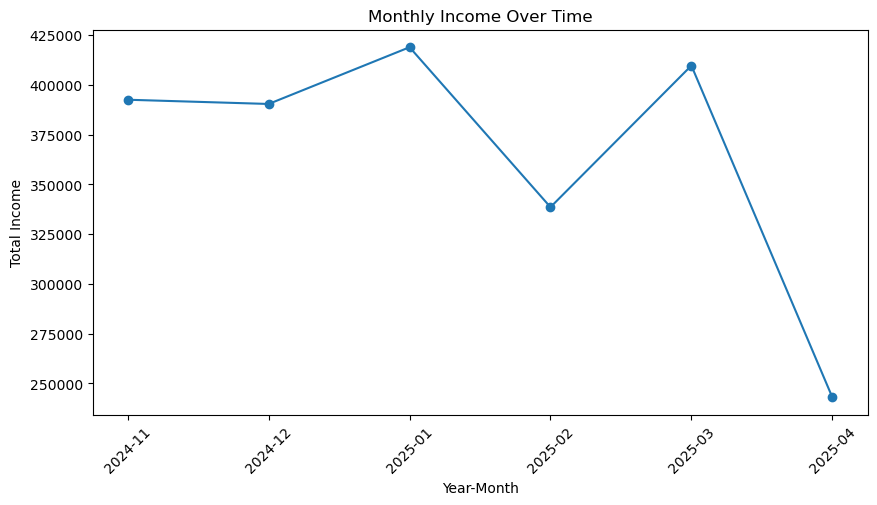

In [ ]:
#plot the data Monthly Income Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(grouped_data_income.index, grouped_data_income.values, marker='o', linestyle='-')
plt.title('Monthly Income Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#filter the data to include only expense records
expense_data = finance_data[finance_data['Type'] == 'Expense']
expense_data.head(5)

,Date,Account,Category,Subcategory,Note,Amount,Type,Currency,Year-Month
0,2025-03-04,Wallet,Investment,Cryptocurrency,Spent on Cryptocurrency,4401,Expense,THB,2025-03
1,2024-11-17,Bank Account,Investment,Stock Purchase,Spent on Stock Purchase,8069,Expense,THB,2024-11
2,2024-12-30,Bank Account,Shopping,Clothing,Spent on Clothing,3695,Expense,THB,2024-12
3,2025-02-25,Wallet,Investment,Mutual Fund,Spent on Mutual Fund,6081,Expense,THB,2025-02
4,2025-03-20,Bank Account,Entertainment,Cinema,Spent on Cinema,477,Expense,THB,2025-03


In [ ]:
# group the data by year_month, and sum the amounts
grouped_data_expense = expense_data.groupby('Year-Month')['Amount'].sum().sort_index(ascending=True)
grouped_data_expense

Year-Month
2024-11     95135
2024-12    118342
2025-01     52595
2025-02     72171
2025-03     67811
2025-04     76249
Name: Amount, dtype: int64

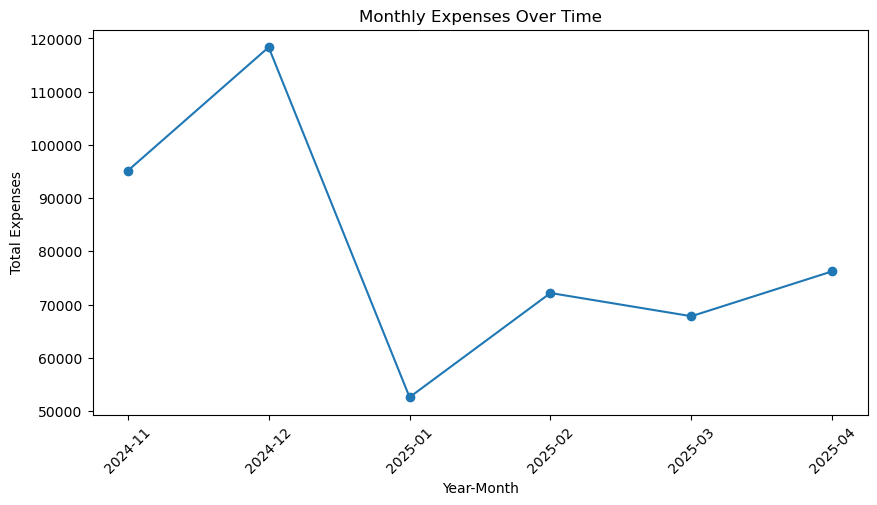

In [ ]:
#plot the data Monthly Expenses Over Time
plt.figure(figsize=(10, 5))
plt.plot(grouped_data_expense.index, grouped_data_expense.values, marker='o', linestyle='-')
plt.title('Monthly Expenses Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# calculate the net income per month
net_income_per_month = grouped_data_income - grouped_data_expense

result = pd.DataFrame({
    'Total Income': grouped_data_income,
    'Total Expenses': grouped_data_expense,
    'Net Income': net_income_per_month
})

print(result)

            Total Income  Total Expenses  Net Income
Year-Month                                          
2024-11           392550           95135      297415
2024-12           390424          118342      272082
2025-01           418936           52595      366341
2025-02           338566           72171      266395
2025-03           409707           67811      341896
2025-04           243060           76249      166811


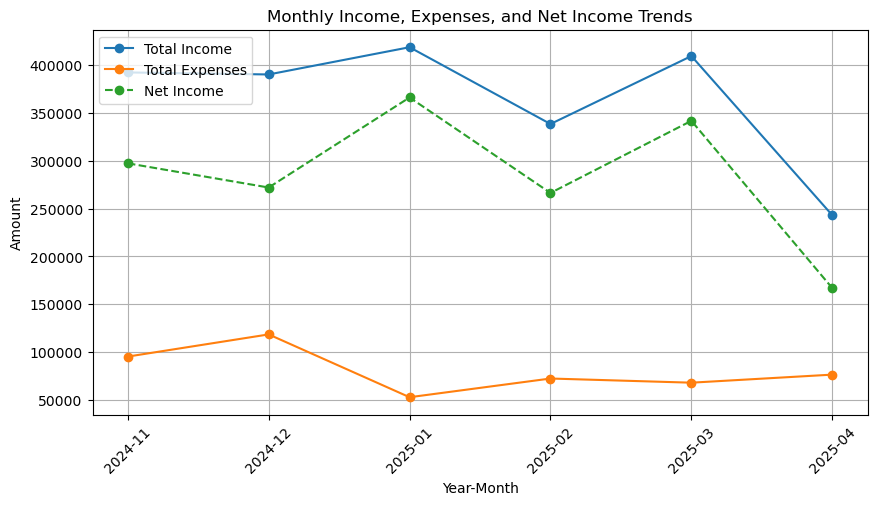

In [ ]:
#plot the data Monthly Income, Expenses, and Net Income Trends
plt.figure(figsize=(10, 5))
plt.plot(result.index, result['Total Income'], marker='o', label='Total Income', linestyle='-')
plt.plot(result.index, result['Total Expenses'], marker='o', label='Total Expenses', linestyle='-')
plt.plot(result.index, result['Net Income'], marker='o', label='Net Income', linestyle='--')
plt.title('Monthly Income, Expenses, and Net Income Trends')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# calculate saving rate per month
net_income_per_month = grouped_data_income - grouped_data_expense
saving_rate_per_month  = (net_income_per_month / grouped_data_income) * 100

result = pd.DataFrame({
    'Total Income': grouped_data_income,
    'Total Expenses': grouped_data_expense,
    'Amount Saved': net_income_per_month,
    'Saving Rate (%)': saving_rate_per_month
})

print(result)

            Total Income  Total Expenses  Amount Saved  Saving Rate (%)
Year-Month                                                             
2024-11           392550           95135        297415        75.764871
2024-12           390424          118342        272082        69.688851
2025-01           418936           52595        366341        87.445576
2025-02           338566           72171        266395        78.683329
2025-03           409707           67811        341896        83.448904
2025-04           243060           76249        166811        68.629556


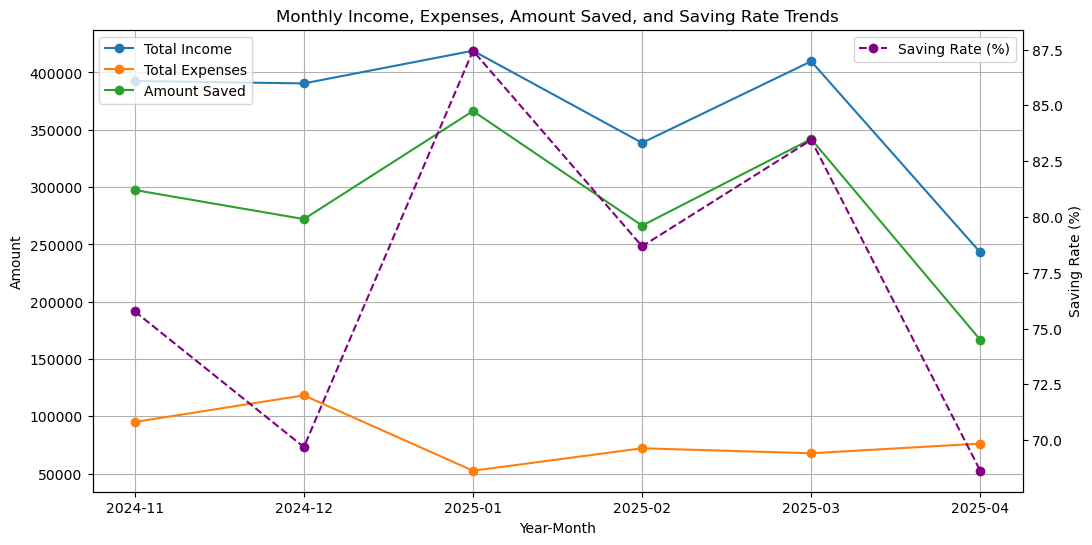

In [ ]:
# Plot Total Income, Total Expenses, and Amount Saved on the primary y-axis

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(result.index, result["Total Income"], marker='o', label='Total Income', linestyle='-')
ax1.plot(result.index, result["Total Expenses"], marker='o', label='Total Expenses', linestyle='-')
ax1.plot(result.index, result["Amount Saved"], marker='o', label='Amount Saved', linestyle='-')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Amount')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a secondary y-axis for Saving Rate (%)
ax2 = ax1.twinx()
ax2.plot(result.index, result["Saving Rate (%)"], marker='o', label='Saving Rate (%)', linestyle='--', color='purple')
ax2.set_ylabel('Saving Rate (%)')
ax2.legend(loc='upper right')

plt.title('Monthly Income, Expenses, Amount Saved, and Saving Rate Trends')
plt.xticks(rotation=45)
plt.show()

